# Project: Investigate a Dataset (TMDb Movie Data)

>The primary aim of this project is to perform summary statistics and also to answer certain questions about the Dataset through Data Analysis using Pandas, Numpy, Matplotlib and Seaborn. The whole process is splitted into four Parts.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

>I Choose TMDb Movie Dataset for the
Data Analysis Project. This data 
set contains information
about 10,000 movies collected from
The Movie Database (TMDb) between 1960 to 2015,
including user ratings and revenue.
>The Dataset has 10866 rows and 21 columns(Features).

>The columns are:
  <li>id</li>
  <li>imdb_id</li>
  <li>popularity</li>
  <li>budget</li>
  <li>revenue</li>
  <li>original_title</li>
  <li>cast</li>
  <li>homepage</li>
  <li>director</li>
  <li>tagline</li>
  <li>keywords</li>
  <li>overview </li>
  <li>runtime</li>
  <li>genres</li>
  <li>production_companies</li>
  <li>release_date</li>
  <li>vote_count</li>
  <li>vote_average </li>
  <li>release_year</li>
  <li>budget_adj</li>
  <li>revenue_adj</li>

## Questions for Analysis

> <li>Which year has the highest number of Movie Released</li>
> <li>Which movie has the highest and lowest Budget</li>
> <li>Which movie has the highest and lowest profit</li>
> <li>Which movie has the highest and lowest Revenue</li>
> <li>Top 20 Directors who directed Maximum Movies</li>
> <li>Which month Released the Highest Number of movies </li>
> <li>Which Year Has the Highest Average Profit</li>
> <li>Which Month Has the Highest Average Profit</li>
> <li>Average Runtime of Movies from year to year</li>
> <li>Top 10 most Popular Movies</li>
> <li>Checking for any relationship Between revenue, budget, popularity, profit, runtime and vote_count</li>
> <li>Genre with the Highest Movie Release</li>
> <li>Production Companies with the Highest Movie Released </li>
> <li>Most Filmed Cast </li>

In [2]:
# Installing the necessary packages for the Data Analysis Process

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Check the available files in the working Directory
import os
os.listdir()

['Investigate_a_Dataset.html',
 'Database_No_show_appointments',
 'Database_Ncis_and_Census_data',
 '.ipynb_checkpoints',
 'Database_TMDb_movie_data',
 'Investigate_a_Dataset.ipynb',
 'Database_Soccer',
 'workspace.zip']

# <a id='wrangling'></a>
# Data Wrangling

> Transforming data from one "raw" data form into another format with the intent of making it more appropriate and valuable for analytics purpose

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

#Print the first 3 rows of the dataset
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#Print the last 3 rows of the dataset
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
# print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
#Getting the shape of the Dataframe
df.shape

(10866, 21)

In [8]:
print(f"The Movie Database(TMDb) Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The Movie Database(TMDb) Dataset has 10866 rows and 21 columns


In [9]:
#Checking for columns with Null Values(Missing Values) and counting them 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> so there are some movies with unknown cast, others with unknown directors and others with unknown geners.

In [10]:
#Getting the columns with the most missing values
df.isnull().sum().sort_values(ascending=False).head()

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
dtype: int64

In [11]:
# print the statistical summary of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Observation
>From the loaded Dataset above, it is shown that the budget, revenue, budget_adj and revenue_adj has some of their values as 0 
#### Also the columns with the most missing values are 
><li>homepage</li>
><li>tagline </li>
><li>keywords </li>

# Data Cleaning (Removing Unwanted informations from the dataset)
>My Data Cleaning Process includes:
  <li>Checking for Duplicate Rows and Dropping them</li>
  <li>Dropping of unwanted Columns during the Analysis Process</li>
  <li>Checking the Columns Data Type, change if neccessary</li>
  <li>Feature Engineering: Adding more columns to make Analysis Better</li>

### Removing Duplicate Rows  

In [12]:
#Check for Duplicate
df.duplicated().sum()

1

In [13]:
#Getting the duplicate row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [14]:
#Dropping the duplicate row with drop_duplicates()
df.drop_duplicates(inplace=True)

In [15]:
#Checking for the number of rows after dropping the duplicate 
print(f"After removing the duplicated row, the dataset now has {df.shape[0]} and the column remains {df.shape[1]}")

After removing the duplicated row, the dataset now has 10865 and the column remains 21


### Removal of Unwanted Columns 

In [16]:
#List out the columns to be removed 
column_to_be_dropped = ['homepage', 'tagline', 'keywords', 'budget_adj', 'revenue_adj', 'overview', 'imdb_id']

#Now use the drop() function from pandas to drop the above listed columns setting axis to 1, also setting inplace to True to make the change effective
df.drop(column_to_be_dropped, axis=1, inplace=True)

In [17]:
#Now take a new look on the dataframe confirming the removal of the unwanted columns 
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [18]:
#check if the columns have been successfully removed
assert df.columns.any() in ['id', 'budget', 'revenue', 'original_title', 'cast', 'director', 'overview' , 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year']

In [19]:
# Now Check for the shape of the available Dataset 
df.shape

(10865, 14)

In [20]:
print(f'After Columns removal, the Dataset has row {df.shape[0]} and column of {df.shape[1]}')

After Columns removal, the Dataset has row 10865 and column of 14


In [21]:
# Making a count for the budget and revenue column with Zero 
print(f"Rows With Zero Values In The Budget Column is {len(df[df['budget']==0])}")
print(f"Rows With Zero Values In The Revenue Column is {len(df[df['revenue']==0])}")

#It will be too bad dropping columns with Zeros as they are almost half the whole dataset

Rows With Zero Values In The Budget Column is 5696
Rows With Zero Values In The Revenue Column is 6016


### Checking the Columns Data Type, change if neccessary

In [22]:
# Checking the data type of the available columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


>From the above information, each columns has a correct DataType except the 'release_date' column, 
>Correcting the release_date Column by converting it into Datetime Format 

In [23]:
#Since the release_date was given in object dtype
#convert the column release_date into a datetime dtype Using pd.to_datetime() 

df['release_date'] = pd.to_datetime(df['release_date'])

In [24]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [25]:
# Asserting the conversion into datetime was successful
assert df['release_date'].dtypes == 'datetime64[ns]'

### Feature Engineering: Creating a new Column to make Analysis better

In [26]:
# Since we have budget and revenue column I can generate what the profit will be by subtracting budget from revenue
# Creating a coumn named 'profit'
df['profit'] = df['revenue'] - df['budget']

In [27]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


In [28]:
# Also Creating a column to obtain the month from the release_date 
df['month_release'] = df['release_date'].dt.month

In [29]:
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit,month_release
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810,6
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354,5


# <a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1 : Which year has the highest number of Movie Released

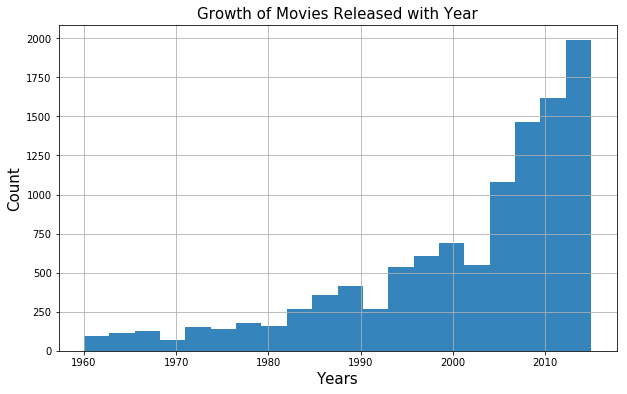

In [86]:
# Checking how movies release grow with time

ax = df['release_year'].hist(alpha=0.9, bins=20, figsize=(10,6))
ax.set_ylabel('Count', {'fontsize':15})
ax.set_xlabel('Years', {'fontsize':15})
ax.set_title('Growth of Movies Released with Year', {'fontsize':15})
plt.show()

> From the plot above it can be shown that movies released increase massively as year increase

In [87]:
#Make a group for each year using pd.groupby() and count the number of movies produced for each year
df.groupby(by = 'release_year')['id'].count().head(20) #Get the first 20

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    40
1968    39
1969    31
1970    41
1971    55
1972    40
1973    55
1974    47
1975    44
1976    47
1977    57
1978    65
1979    57
Name: id, dtype: int64

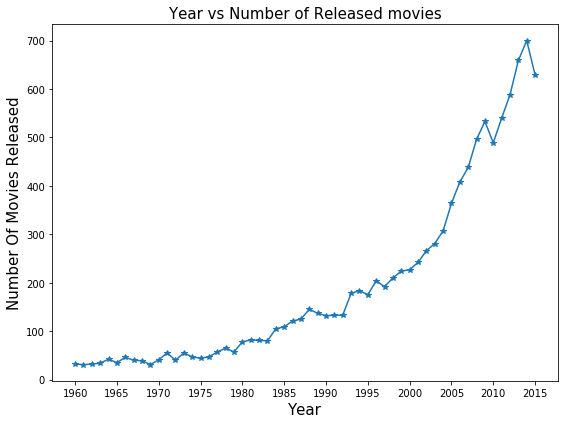

In [88]:
# Make a plot to show which year has the highest movies produced using plot() function setting marker='*' 
fig, ax1 = plt.subplots(figsize = (8, 6))
ax1 = df.groupby(by = 'release_year')['id'].count().plot(marker='*')

# Set the x label, y label and the title for the plot
ax1.set_xlabel('Year', {'fontsize':15})
ax1.set_xticks(np.arange(1960, 2016, 5))
ax1.set_ylabel('Number Of Movies Released', {'fontsize':15})
ax1.set_title('Year vs Number of Released movies', {'fontsize':15})
plt.tight_layout()
plt.show()

> A plot Counting the number of movies release each year. I set marker to  * , to show the year with respect to the number of movies released 

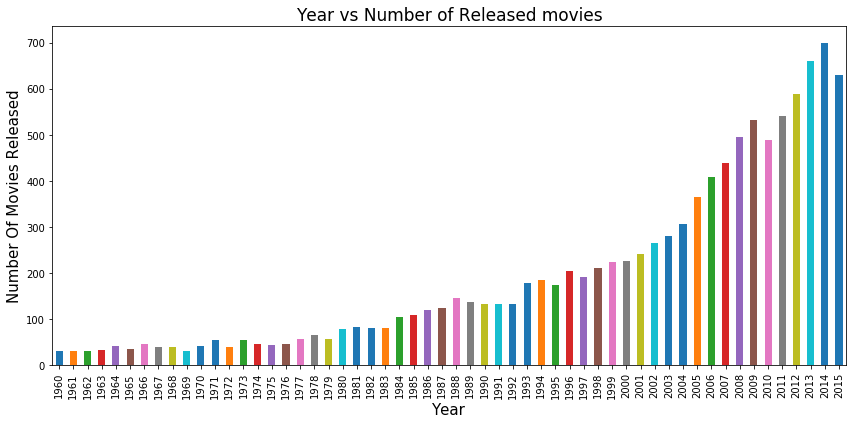

In [89]:
# Make a plot to show which year has the highest movies produced using plot() function setting kind='bar'
fig, ax2 = plt.subplots(figsize = (12, 6))
ax2 = df.groupby(by = 'release_year')['id'].count().plot(kind='bar')
# Set the x label, y label and the title for the plot
ax2.set_xlabel('Year', {'fontsize':15})
ax2.set_ylabel('Number Of Movies Released', {'fontsize':15})
ax2.set_title('Year vs Number of Released movies', {'fontsize':17})
plt.tight_layout()

>A Bar plot Counting the Number of movies released each year

>From the plot it can be concluded that 2014 has the highest Number of movies released, followed by 2013 then 2015

>Setting y axis to Count(Number of Movies Released), and x axis to Year 

### Question 2 : Which movie has the highest and lowest Budget

In [90]:
"""
   So i will be creating a function that give the information about the lowest and highest of any column
   I will be using pd.idxmax() to get the column with maximum value
   I will be using pd.idxmin() to get the column with minimum value
   I will also be concatenating the series of the whole minimum and maximum row
"""

def get_low_and_highest(dataframe, column1, column2):
  high = dataframe[column1].idxmax()  #index of the maximum value
  low = dataframe[column1].idxmin()   #index of the miiimum value
  high_index = dataframe.loc[high]    #Series(The whole row about the maximum value)
  low_index = dataframe.loc[low]      #Series(The whole row about the minimun value)
  #Concatenating the low_index series with high_index series
  new_data = pd.concat([low_index, high_index], axis=1)
  print(f"The movie with the highest {column1} is: {dataframe[column2][high]}")
  print(f"The movie with the lowest {column1} is: {dataframe[column2][low]}")
  new_data.columns = ['low', 'high']
  return new_data

In [91]:
#calling the function get_low_and_highest() on the 'budget' column to get the movies with low and high budget
get_low_and_highest(df, 'budget', 'original_title')

The movie with the highest budget is: The Warrior's Way
The movie with the lowest budget is: Mr. Holmes


,low,high
id,280996,46528
popularity,3.92733,0.25054
budget,0,425000000
revenue,29355203,11087569
original_title,Mr. Holmes,The Warrior's Way
cast,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Bill Condon,Sngmoo Lee
runtime,103,100
genres,Mystery|Drama,Adventure|Fantasy|Action|Western|Thriller
production_companies,BBC Films|See-Saw Films|FilmNation Entertainme...,Boram Entertainment Inc.


In [92]:
#make a plot which contain top 20 movies which earn highest Budeget.
#Sorting the 'budget' column in descending order and converting it into a Dataframe

budget_data = pd.DataFrame(df['budget'].sort_values(ascending=False))
budget_data['original_title'] = df['original_title']
budget_data.head()

,budget,original_title
2244,425000000,The Warrior's Way
3375,380000000,Pirates of the Caribbean: On Stranger Tides
7387,300000000,Pirates of the Caribbean: At World's End
14,280000000,Avengers: Age of Ultron
6570,270000000,Superman Returns


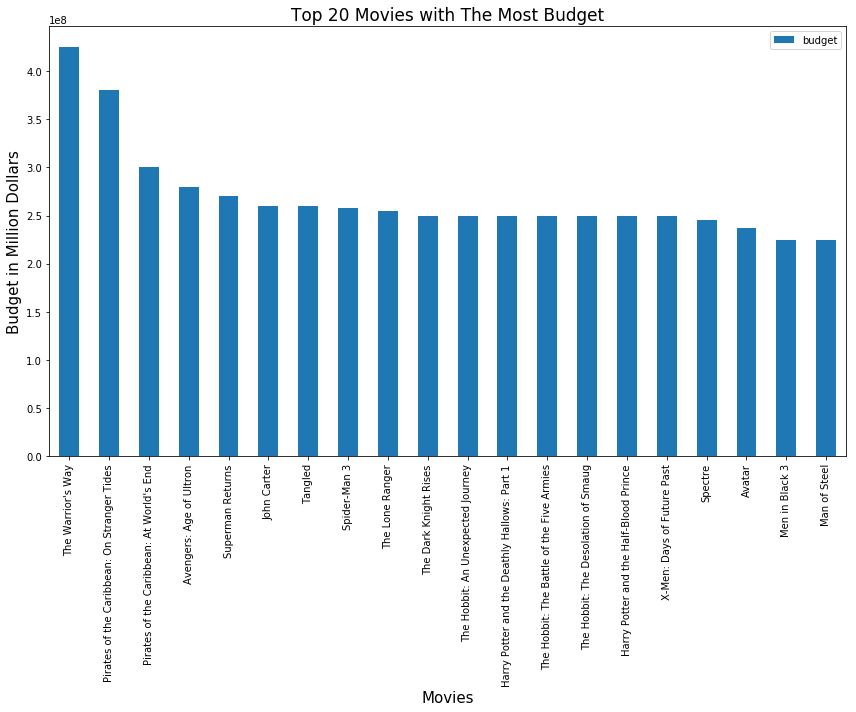

In [93]:
#Make A Bar Plot showing the top 20 movies with the most budget 
xlabel = list(budget_data['original_title'][:20])
ax = budget_data.head(20).plot(kind='bar', figsize=(12,10), fontsize=10)
ax.set_xticklabels(xlabel)

# Set the x label, y label and the title for the plot
ax.set_xlabel('Movies', {'fontsize':15})
ax.set_ylabel('Budget in Million Dollars', {'fontsize':15})
ax.set_title('Top 20 Movies with The Most Budget', {'fontsize':17})
plt.tight_layout()
plt.show()

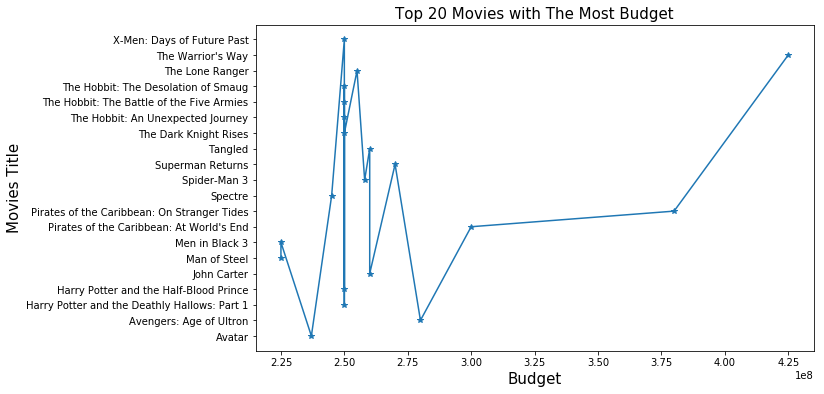

In [94]:
#Make A Plot showing the 20 movies with the most budget
x = list(budget_data['budget'].head(20))
y = list(budget_data['original_title'].head(20))

# Set the x label and the title for the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, marker="*")
ax.set_title("Top 20 Movies with The Most Budget",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 15)
ax.set_ylabel('Movies Title', {'fontsize':15})
plt.show()

> A Bar Plot and a simple plot showing the top 20 movies with the most Budget 

>It is shown from above that the movies with highest budget is 'The Warrior's Way' .  

### Question 3 : Which movie has the highest and lowest profit

In [95]:
#calling the function get_low_and_highest() on the 'profit' column to get the movies with low and high profit
get_low_and_highest(df, 'profit', 'original_title')

The movie with the highest profit is: Avatar
The movie with the lowest profit is: The Warrior's Way


,low,high
id,46528,19995
popularity,0.25054,9.43277
budget,425000000,237000000
revenue,11087569,2781505847
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
production_companies,Boram Entertainment Inc.,Ingenious Film Partners|Twentieth Century Fox ...


In [96]:
#make a plot which contain top 20 movies which earn highest profit.
#Sorting the 'Profit' column in descending order and converting it into a Dataframe

new_data = pd.DataFrame(df['profit'].sort_values(ascending=False))

In [97]:
#creating a new column called original_title
new_data['original_title'] = df['original_title']

In [98]:
new_data.head()

,profit,original_title
1386,2544505847,Avatar
3,1868178225,Star Wars: The Force Awakens
5231,1645034188,Titanic
0,1363528810,Jurassic World
4,1316249360,Furious 7


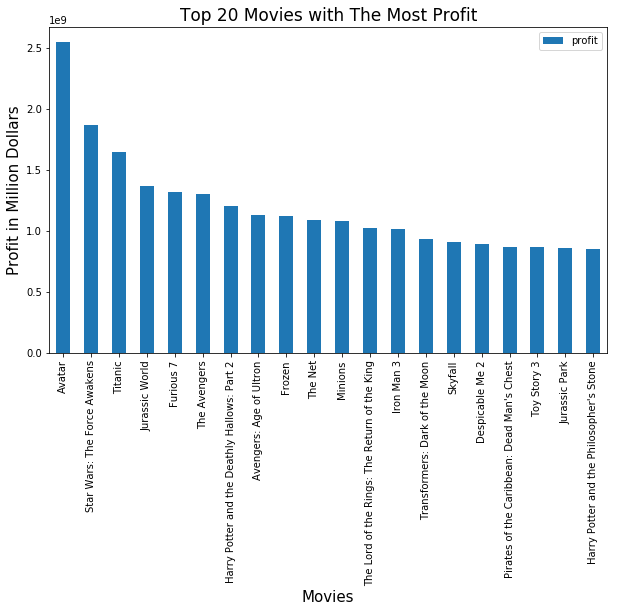

In [99]:
#Make A Bar Plot showing the top 20 movies with the most profit 
xlabel = list(new_data['original_title'][:20])
ax = new_data.head(20).plot(kind='bar', figsize=(10,6), fontsize=10)
ax.set_xticklabels(xlabel)
# Set the x label, y label and the title for the plot
ax.set_xlabel('Movies', {'fontsize':15})
ax.set_ylabel('Profit in Million Dollars', {'fontsize':15})
ax.set_title('Top 20 Movies with The Most Profit', {'fontsize':17})

plt.show()

> A Bar Plot  showing the top 20 movies with the most Profit 

>It is shown from above that the movies with highest Profit is 'Avatar' .  

### Question 4 : Which movie has the highest and lowest Revenue 

In [100]:
#Calling the function get_low_and_highest() on the 'revenue' column to get the movies with low and high revenue
get_low_and_highest(df, 'revenue', 'original_title')

The movie with the highest revenue is: Avatar
The movie with the lowest revenue is: Wild Card


,low,high
id,265208,19995
popularity,2.93234,9.43277
budget,30000000,237000000
revenue,0,2781505847
original_title,Wild Card,Avatar
cast,Jason Statham|Michael Angarano|Milo Ventimigli...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Simon West,James Cameron
runtime,92,162
genres,Thriller|Crime|Drama,Action|Adventure|Fantasy|Science Fiction
production_companies,Current Entertainment|Lionsgate|Sierra / Affin...,Ingenious Film Partners|Twentieth Century Fox ...


In [101]:
#make a plot which contain top 20 movies which earn highest revenue.
#sort the 'revenue' column in decending order and convert it into a Dataframe
data = pd.DataFrame(df['revenue'].sort_values(ascending=False))
data['original_title'] = df['original_title']
data.head()

,revenue,original_title
1386,2781505847,Avatar
3,2068178225,Star Wars: The Force Awakens
5231,1845034188,Titanic
4361,1519557910,The Avengers
0,1513528810,Jurassic World


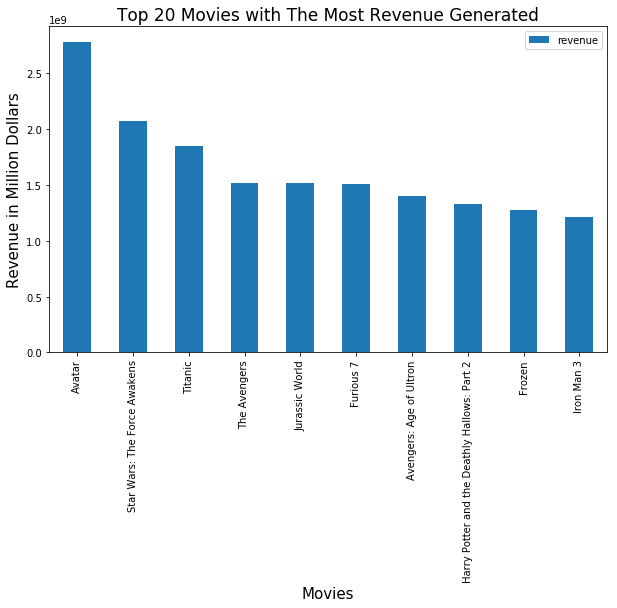

In [102]:
#Make A Bar Plot showing the 10 movies with thw most revenue 
xlabel = list(data['original_title'][:10])
ax = data.head(10).plot(kind='bar', figsize=(10,6), fontsize=10)

# Set the x label, y label and the title for the plot
ax.set_xticklabels(xlabel)
ax.set_xlabel('Movies', {'fontsize':15})
ax.set_ylabel('Revenue in Million Dollars', {'fontsize':15})
ax.set_title('Top 20 Movies with The Most Revenue Generated', {'fontsize':17})
plt.show()

> A Bar Plot showing the top 10 movies with the most Revenue 

>It is shown from above that the movies with highest Revenue is 'Avatar',  

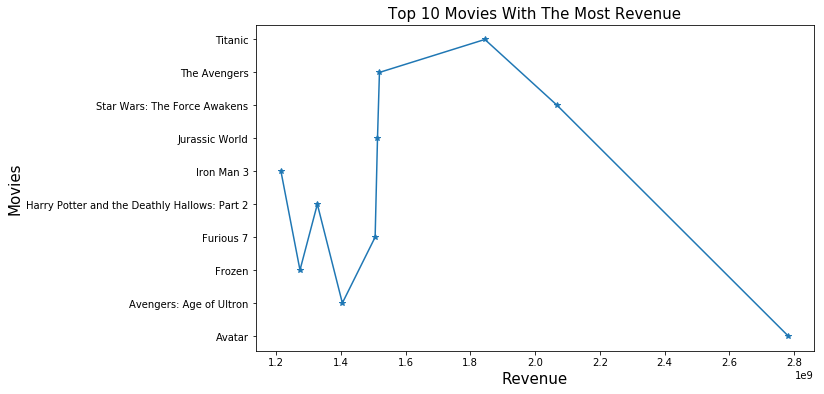

In [103]:
#Make A Plot showing the 10 movies with thw most revenue 
x = list(data['revenue'].head(10))
y = list(data['original_title'].head(10))

# Set the x label and the title for the plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, marker="*")
ax.set_title("Top 10 Movies With The Most Revenue",fontsize = 15)
ax.set_ylabel('Movies', {'fontsize':15})
ax.set_xlabel("Revenue",fontsize = 15)

plt.show()

>A Plot showing the top 10 movies with the most Revenue

>It is shown from above that the movies with highest Revenue is 'Avatar',

In [104]:
#Calling the function get_low_and_highest() on the 'runtime' column to get the movies with low and high runtime
get_low_and_highest(df, 'runtime', 'original_title')

The movie with the highest runtime is: The Story of Film: An Odyssey
The movie with the lowest runtime is: Mythica: The Necromancer


,low,high
id,370687,125336
popularity,1.87604,0.006925
budget,0,0
revenue,0,0
original_title,Mythica: The Necromancer,The Story of Film: An Odyssey
cast,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director,A. Todd Smith,Mark Cousins
runtime,0,900
genres,Fantasy|Action|Adventure,Documentary
production_companies,Arrowstorm Entertainment|Camera 40 Productions...,NaN


In [105]:
#make a plot which contain top 10 movies which earn highest runtime.
#sort the 'runtime' column in decending order and convert it into a Dataframe

runtime_data = pd.DataFrame(df['runtime'].sort_values(ascending=False))
runtime_data['original_title'] = df['original_title']
runtime_data.head()

,runtime,original_title
3894,900,The Story of Film: An Odyssey
4041,877,Taken
2722,705,Band of Brothers
6176,566,Shoah
6181,561,"North and South, Book I"


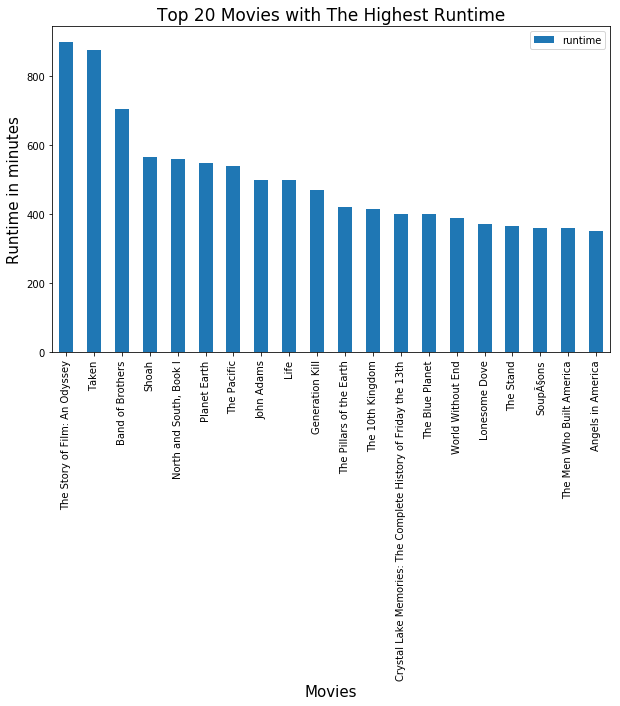

In [137]:
#Make A Bar Plot showing the 10 movies with thw most revenue 
xlabel = list(runtime_data['original_title'][:20])
ax = runtime_data.head(20).plot(kind='bar', figsize=(10,6), fontsize=10)
ax.set_xticklabels(xlabel)

ax.set_xlabel('Movies', {'fontsize':15})
ax.set_ylabel('Runtime in minutes', {'fontsize':15})
ax.set_title('Top 20 Movies with The Highest Runtime', {'fontsize':17})

plt.show()

> A bar Plot depicting the movies with the most Runtime 

> From the plot above, the movies with the highest runtime is 'The Story of Film: An Odyssey'

### Question 5: Top 20 Directors who directed Maximum Movies

In [107]:
# Make a value count on the director column to know which director direct the most movies
# sort the value in descending order taking the first 25
df['director'].value_counts().sort_values(ascending=False).head(25)

Woody Allen             45
Clint Eastwood          34
Martin Scorsese         29
Steven Spielberg        29
Ridley Scott            23
Steven Soderbergh       22
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              19
Wes Craven              19
Barry Levinson          19
John Carpenter          18
David Cronenberg        18
Mike Nichols            18
Rob Reiner              18
Spike Lee               17
Sidney Lumet            17
Renny Harlin            17
Peter Hyams             17
Stephen Frears          17
Oliver Stone            17
Walter Hill             17
Robert Zemeckis         17
Francis Ford Coppola    17
Name: director, dtype: int64

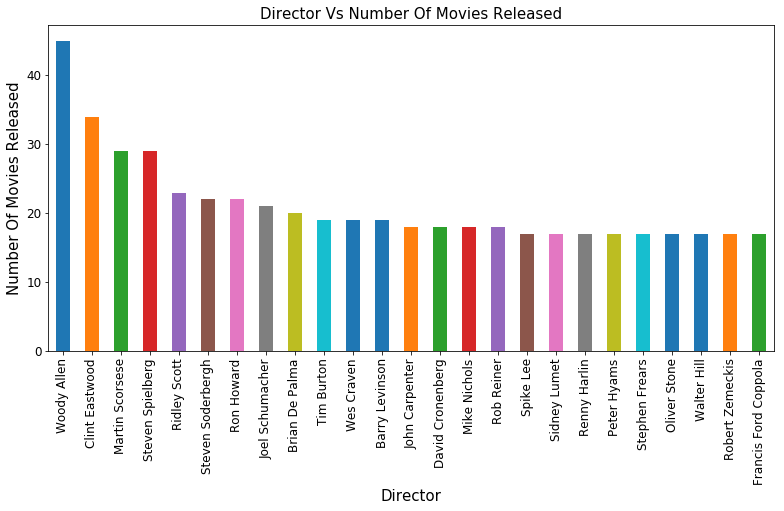

In [108]:
# Make a bar plot showing the top 25 director with the most movie direct  
ax = df['director'].value_counts().sort_values(ascending=False).head(25).plot(kind='bar',figsize=(13,6),fontsize=12)
#setup the title and the labels 
plt.title("Director Vs Number Of Movies Released",fontsize=15)

ax.set_xlabel('Director', {'fontsize':15})
ax.set_ylabel('Number Of Movies Released', {'fontsize':15})

plt.show()

>A bar Plot showing the number of movies released by each Director

>From the above plot we can conclude that Woody Allen Directs the most Movies 

### Question 6: Which month Released the Highest Number of movies 

In [109]:
# Make a value count on the month_release column to know which month has the most movies released
df2 = df.month_release.value_counts(ascending=False).sort_index()

In [110]:
#Convert the above series into Dataframe
df2 = pd.DataFrame(df2)
# Create a column for months
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df2['month'] = months

In [111]:
# Replace the month_release column into 'Count'
df2.rename(columns={'month_release':'Count'},inplace=True)

In [112]:
df2

,Count,month
1,919,Jan
2,691,Feb
3,822,Mar
4,797,Apr
5,809,May
6,827,Jun
7,799,Jul
8,918,Aug
9,1331,Sep
10,1153,Oct


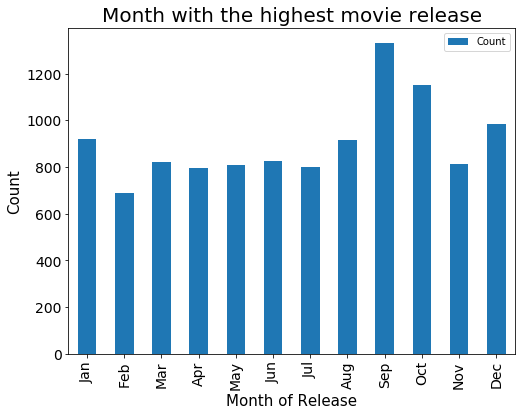

In [113]:
# Make a bar plot showing months with their number of release movies 
ax = df2.plot(kind='bar', figsize=(8,6), fontsize=14)

#setup the title and the labels 
ax.set_ylabel('Count',fontdict={'fontsize':15})
ax.set_xticklabels(df2['month'])
ax.set_xlabel('Month of Release',fontdict={'fontsize':15})
ax.set_title('Month with the highest movie release',fontdict={'fontsize':20})
plt.show()

>A bar Plot that shows which Month has the Highest amount of movie released

>From the plot it is shown that September has the Hihgest number of movies released

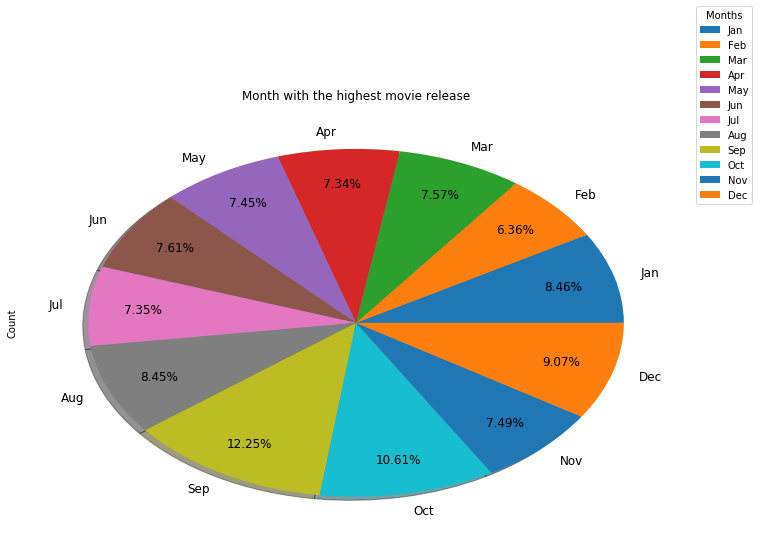

In [114]:
# Make a pie chart representing the percentage of movies released by each month

ax3 = df2.plot.pie(y='Count', autopct='%1.2f%%', shadow=True, startangle=0, pctdistance=0.8, figsize=(12,8), fontsize=12, labels=df2['month'])
plt.title('Month with the highest movie release')
ax3.legend(df2['month'],
          title="Months",
          loc=6,
          bbox_to_anchor=(1.0, 1))
plt.show()

>Pie Chart showing the percentage month release

>From the above plot we can conclude that there are higher number of movies released in September and October month 

### Question 7: Which Year Has the Highest Average Profit

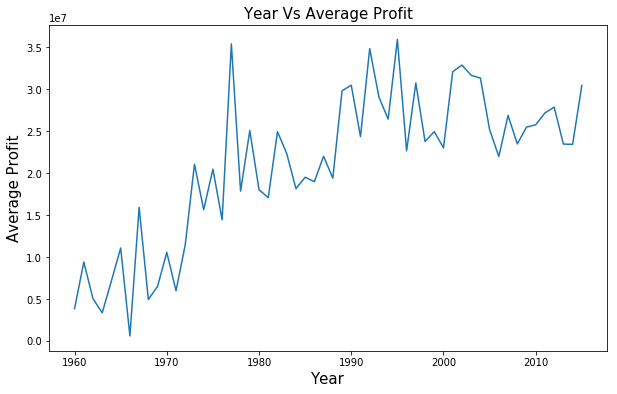

In [115]:
#Take the average of profit made by movies in each year.
#Group the data by their release_year take the profit and find the average then plot
df.groupby('release_year')['profit'].mean().plot(figsize= (10,6))

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Average Profit',fontsize = 15)
plt.show()

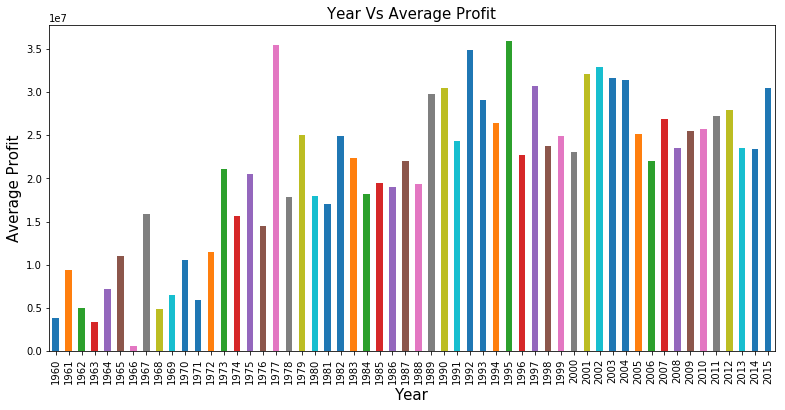

In [116]:
#Take the average of profit made by movies in each year.
#Group the data by their release_year take the profit and find the average then plot
df.groupby('release_year')['profit'].mean().plot(kind='bar', figsize= (13,6))

#setup the title and labels of the figure.
plt.title("Year Vs Average Profit",fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Average Profit',fontsize = 15)
plt.show()

>A Bar Plot and a simple Plot showing the years with the average profit generated

> From the plot, year 2001-2004 was the most profitable year on average, and 1960-1963 was the least profitable year on average

### Question 8: Which Month Has the Highest Average Profit

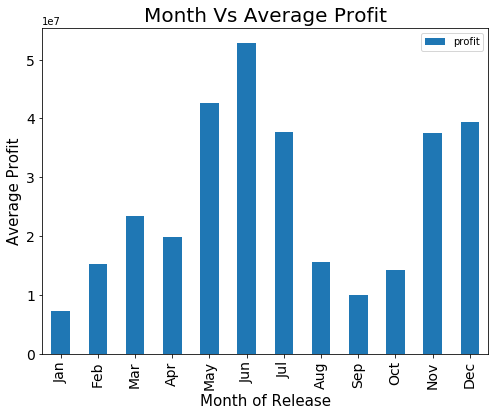

In [117]:
#Take the average of profit made by movies in each month.
#Group the data by their month_release take the profit and find the average then plot

df3 = df.groupby('month_release')['profit'].mean()
df3 = pd.DataFrame(df3)
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df3['month'] = months

#setup the title and labels of the figure.
ax3 = df3.plot(kind='bar', figsize=(8,6), fontsize=14)
ax3.set_ylabel('Average Profit',fontdict={'fontsize':15})
ax3.set_xticklabels(df3['month'])
ax3.set_xlabel('Month of Release',fontdict={'fontsize':15})
ax3.set_title('Month Vs Average Profit',fontdict={'fontsize':20})
plt.show()

>From the above plot it is shown that May, June and July have the maximum Profit on average

### Question 9: Average Runtime of Movies from year to year

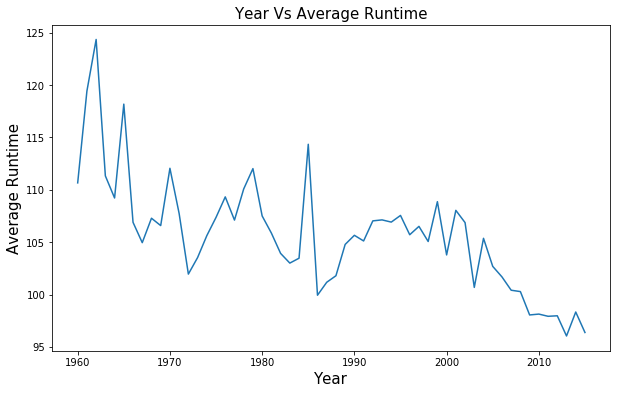

In [118]:
#Take the average of runtime made by movies in each year.
#Group the data by their release_year take the runtime and find the average then plot
df.groupby('release_year')['runtime'].mean().plot(figsize= (10,6))

#setup the title and labels of the figure.
plt.title("Year Vs Average Runtime",fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Average Runtime',fontsize = 15)
plt.show()

> From the above Plot it can be seen that movies runtime decrease averagely as year increases. 

> This thus make sense as people get bored as the lenght gets to much 

### Question 10: Top 10 most Popular Movies 

In [119]:
#Calling the function get_low_and_highest() on the 'popularity' column to get the movie with low and high popularity
get_low_and_highest(df, 'popularity', 'original_title')

The movie with the highest popularity is: Jurassic World
The movie with the lowest popularity is: North and South, Book I


,low,high
id,18729,135397
popularity,6.5e-05,32.9858
budget,0,150000000
revenue,0,1513528810
original_title,"North and South, Book I",Jurassic World
cast,Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,NaN,Colin Trevorrow
runtime,561,124
genres,Drama|History|Western,Action|Adventure|Science Fiction|Thriller
production_companies,NaN,Universal Studios|Amblin Entertainment|Legenda...


In [139]:
"""
   make a plot which contain top 10 movies which earn highest Popularity.
   Get the popularity column and convert it into a Dataframe
   """

pop = pd.DataFrame(df.popularity.head(10))
pop['original_title'] = df['original_title']

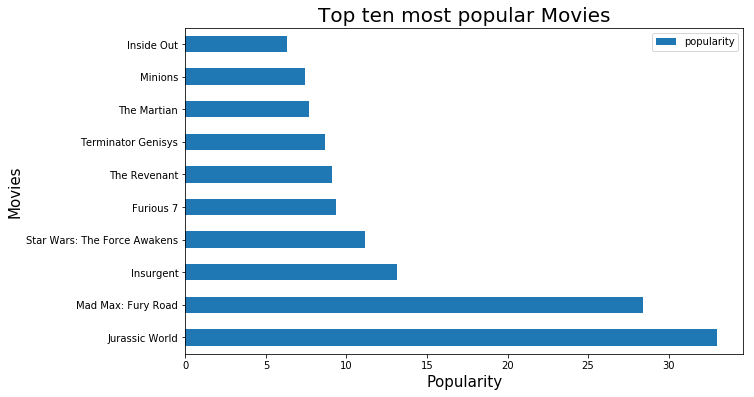

In [140]:
#Plot of the top Ten Most Popular Movies 
ax = pop.head(10).plot(kind='barh', figsize= (10,6))

#setup the title and labels of the figure.
ax.set_ylabel('Movies',fontdict={'fontsize':15})
ax.set_yticklabels(pop['original_title'][0:11])
ax.set_xlabel('Popularity',fontdict={'fontsize':15})
ax.set_title('Top ten most popular Movies',fontdict={'fontsize':20})
plt.show()

> A horizontal bar plot showing the top ten movies with the most Popularity 

> It can be shown from above that the most popular movie was Jurassic World

### Question 11: Checking for any relationship Between revenue, budget, popularity, profit, runtime and vote_count

In [122]:
# Listing out the columns stated in Question 11 and checking for correlation within them  
corr_df = df[['revenue', 'budget', 'popularity', 'profit', 'vote_count', 'runtime']]
corr_df.corr()

,revenue,budget,popularity,profit,vote_count,runtime
revenue,1.000000,0.734928,0.663360,0.976162,0.791174,0.162830
budget,0.734928,1.000000,0.545481,0.570222,0.632719,0.191300
popularity,0.663360,0.545481,1.000000,0.628997,0.800828,0.139032
profit,0.976162,0.570222,0.628997,1.000000,0.755908,0.136022
vote_count,0.791174,0.632719,0.800828,0.755908,1.000000,0.163273
runtime,0.162830,0.191300,0.139032,0.136022,0.163273,1.000000


Text(0.5,1,'HeatMap showing the correlations between revenue, budget, popularity, profit, vote_count, runtime')

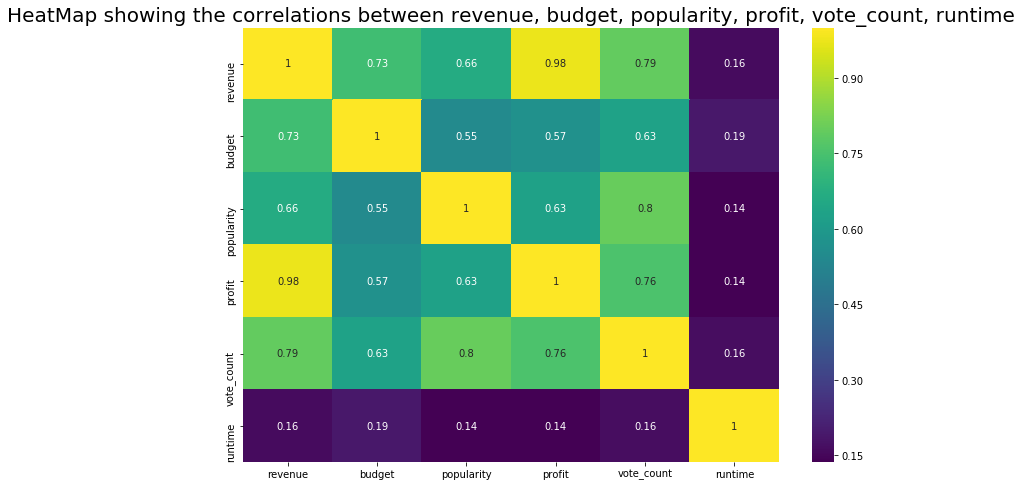

In [123]:
#Plotting the correlation using Heatmap()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_df.corr(), annot=True, cmap='viridis')
ax.set_title('HeatMap showing the correlations between revenue, budget, popularity, profit, vote_count, runtime', fontdict={'fontsize':20})

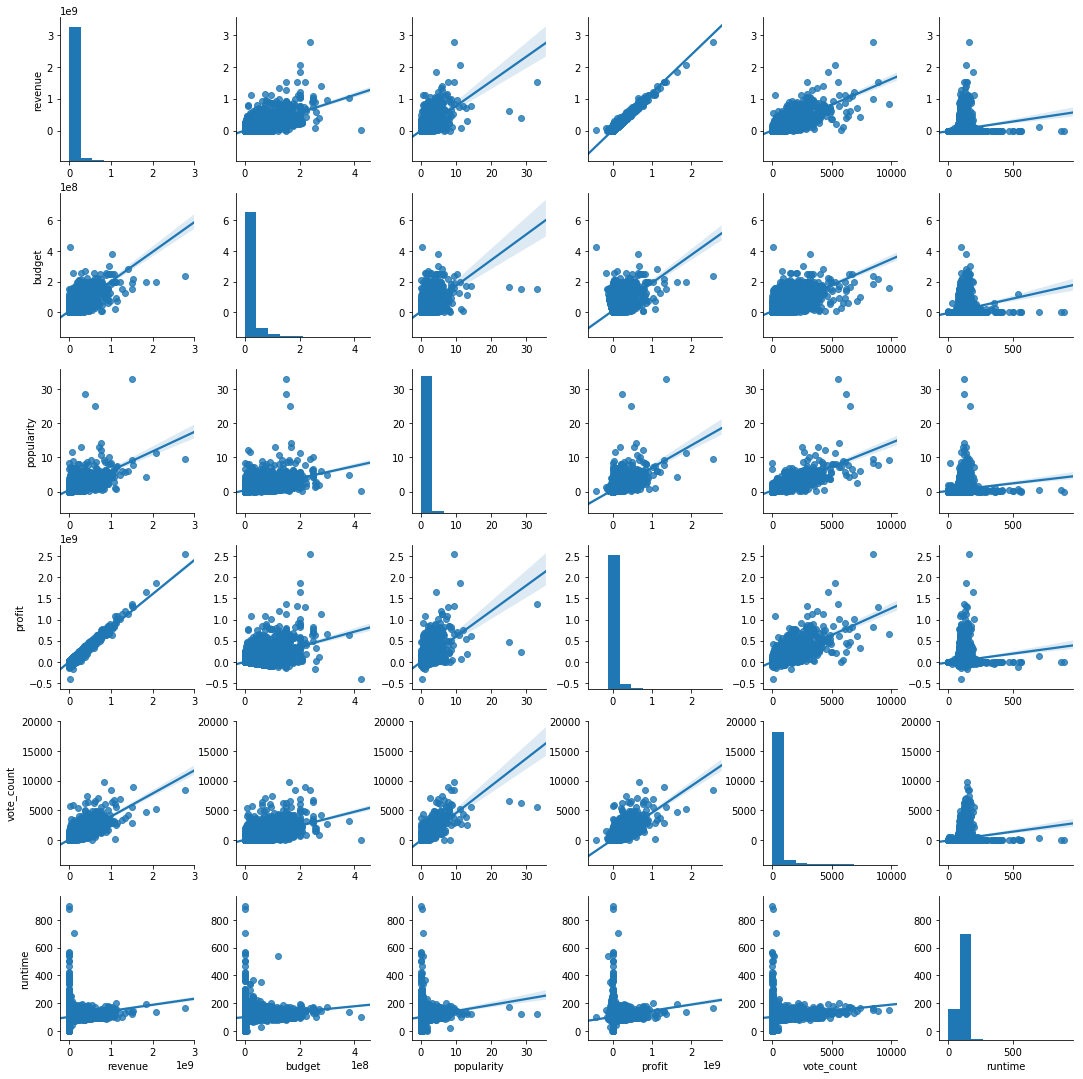

In [124]:
#Make comparison plot by applying the sns.pairplot() on the corr_df setting kind="reg"
sns.pairplot(corr_df, kind="reg")

#### Observation From the pairplot and the heatmap

<li> 1. Budget vs Revenue (correlation=0.73): Budget and revenue both have a positive correlation between them. Means there is a good possibility that movies with higher investments result in better revenues.</li>
<li> 2. Profit Vs Budget (correlation=0.57): Profit And Budget both have a positive correlation between them. Means there is a good possibility that movies with higher investments result in better profit.</li>
<li> 3. Profit Vs Vote count (correlation=0.76): Profit and vote Average have a positive correlation. Means that movie with high ratings (vote count) tends to generate more profit .</li>
<li> 4. Popularity Vs Profit (correlation=0.63): Popularity and profit have a positive correlation. It means that movie with high popularity tends to earn more profit.</li>
<li> 5. Revenue Vs Vote count (correlation=0.79): Revenue and Vote count have a positive correlation. Means that movie with high ratings (vote count) tends to generate more revenue</li>
<li> 6. Popularity Vs Revenue (correlation=0.66): Popularity and revenue have a positive correlation. It means that movie with high popularity tends to generate more revenue.</li>

### Question 12: Genre with the Highest Movie Release

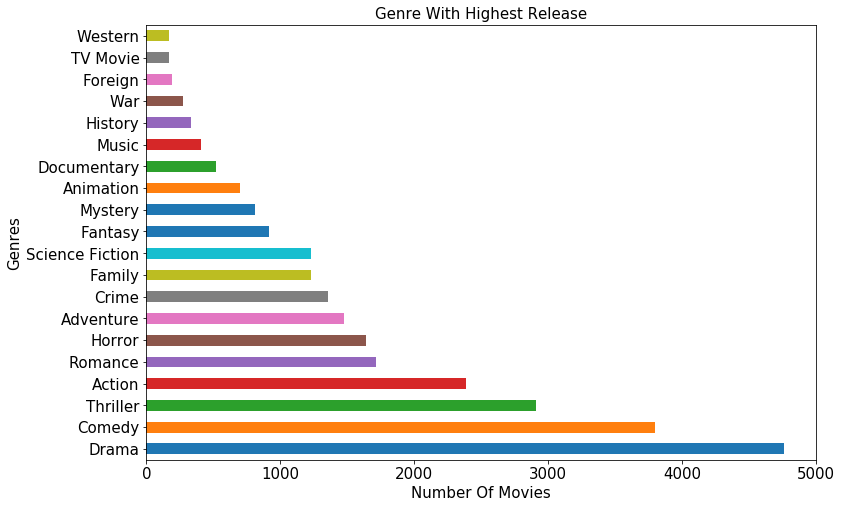

In [125]:
#I will be creating a Function which can take in any object columns. I will be applying df.str.cat() function to Concatenate strings in the Series/Index with given separator
def column_Count(x):
    #concatenate all the rows of the genrs.
    data_df = pd.Series(df[x].str.cat(sep = '|').split('|'))
    #conts each of the genre and return.
    detail = data_df.value_counts(ascending=False)
    return detail


#call the function for counting the movies of each genre.
total_movies_by_genres = column_Count('genres')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_movies_by_genres.plot(kind= 'barh',figsize = (12,8),fontsize=15)

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15)
plt.show()

> A bar plot showing the genres with the most released.

> From the above plot it can be shown that the most produced genres were Drama, comedy, Thriller and Action 

In [126]:
#Concerting the genre series created above into a DataFrame
total_movies_by_genres = pd.DataFrame(column_Count('genres').sort_values(ascending=False).sort_index())
#Reset the index to change the columns
total_movies_by_genres.reset_index(inplace=True)
#Change the columns name into 'Genres and Count'
total_movies_by_genres.columns = ['Genres', 'Count']

In [127]:
total_movies_by_genres.head()

,Genres,Count
0,Action,2384
1,Adventure,1471
2,Animation,699
3,Comedy,3793
4,Crime,1354


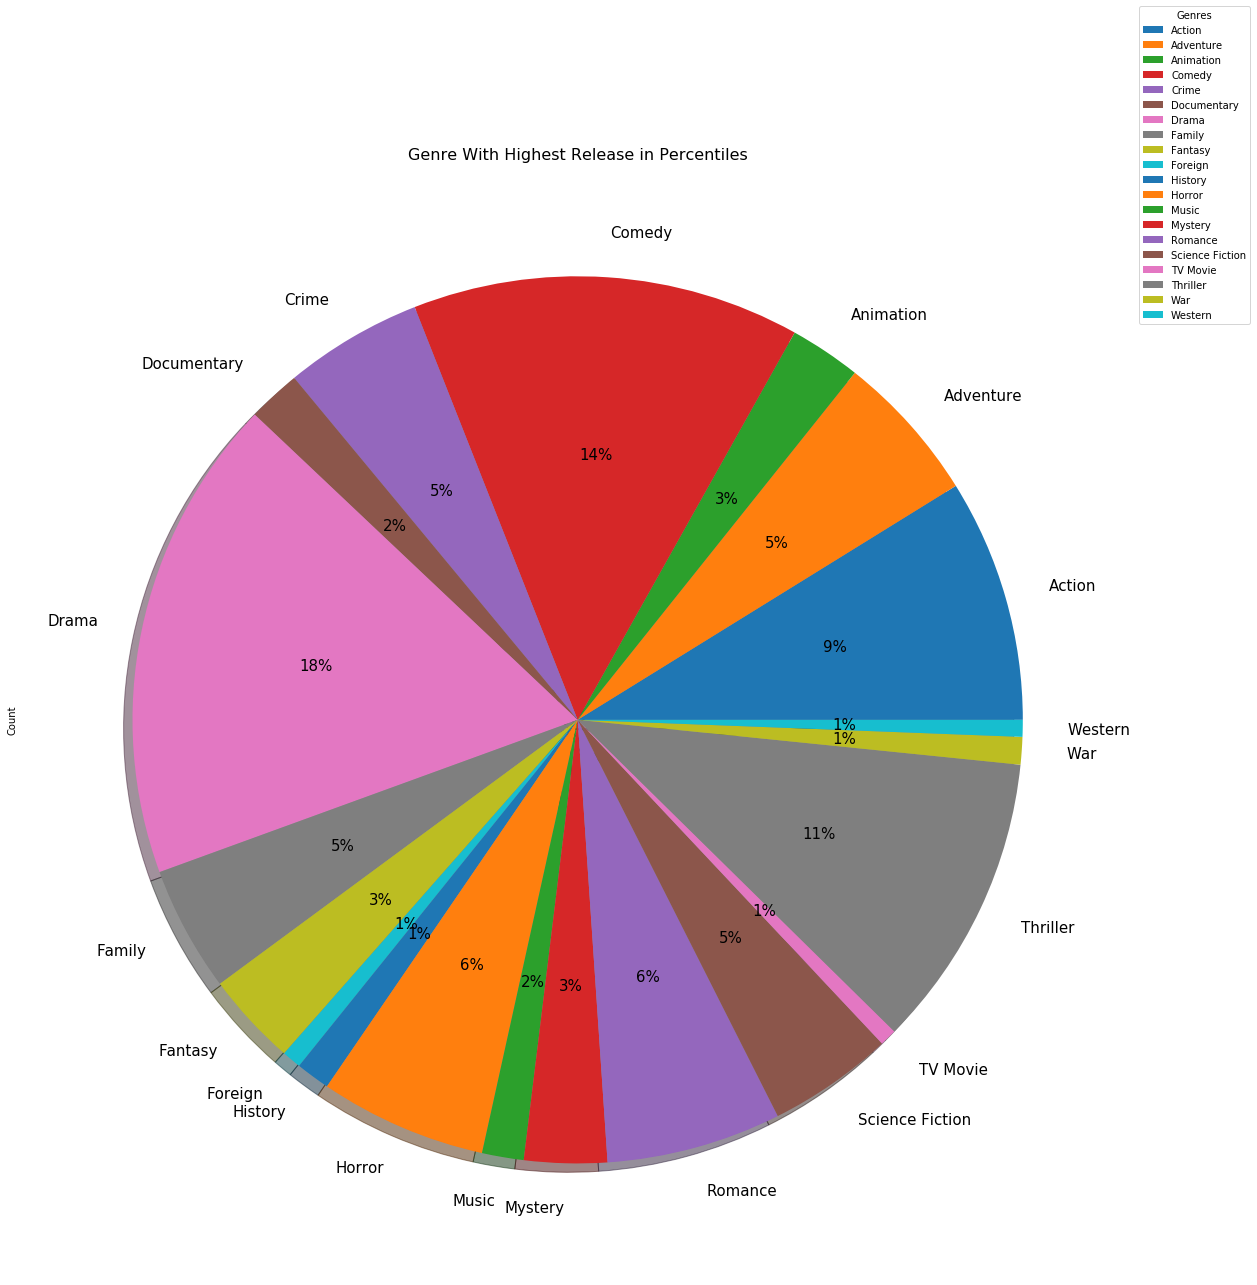

In [128]:
# Make a pie chart representing the percentage of movie genres release year in year out

ax2 = total_movies_by_genres.plot.pie(y='Count', autopct='%1.0f%%', shadow=True, startangle=0, pctdistance=0.6, figsize=(16,16), fontsize=15, labels=total_movies_by_genres['Genres'])

# Set the title with font size
plt.title("Genre With Highest Release in Percentiles",fontsize=16)

#Set a position for the legends 
ax2.legend(total_movies_by_genres['Genres'],
          title="Genres",
          loc=6,
          bbox_to_anchor=(1.0, 1))
plt.tight_layout()

>From the above Plot it can be shown that the most release Genres of movies are Drama, Comedy, Thriller, Action and Romance

### Question 13: Production Companies with the Highest Movie Released 

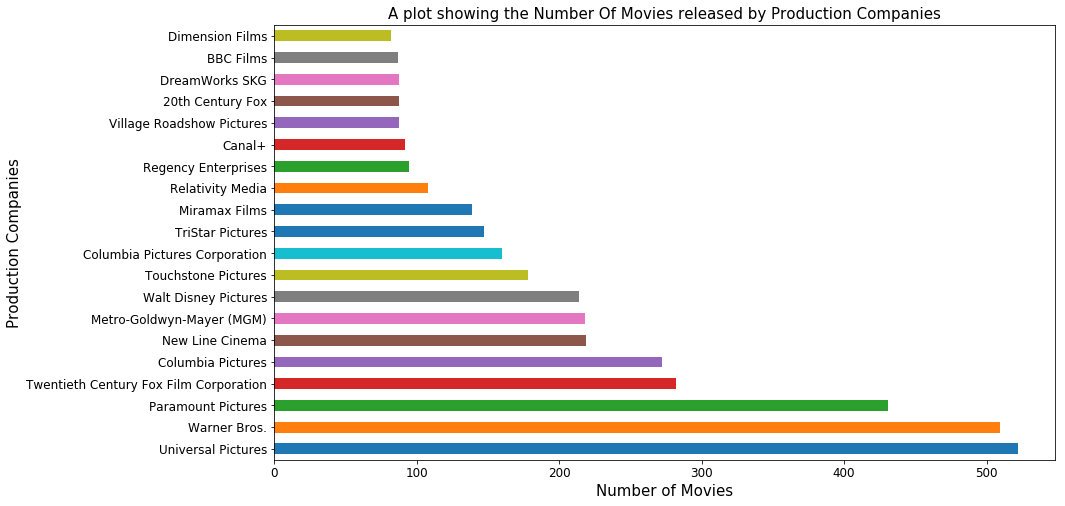

In [133]:
"""call the 'column_Count' function which created earlier for splitting and counting.
Now lets use it to count the number of movies by production_companies."""

count_movies_by_production_companies = column_Count('production_companies')

#plot a barh graph
count_movies_by_production_companies.iloc[:20].plot(kind='barh',figsize=(14,8),fontsize=12)

#setup the title and the labels 
plt.title("A plot showing the Number Of Movies released by Production Companies",fontsize=15)
plt.ylabel("Production Companies",fontsize= 15)

plt.xlabel("Number of Movies",fontsize= 15)
plt.show()

>From the above plot, it can be shown that Universal Pictures and Warner Bros produces more movies 

### Question 14: Most Filmed Cast 

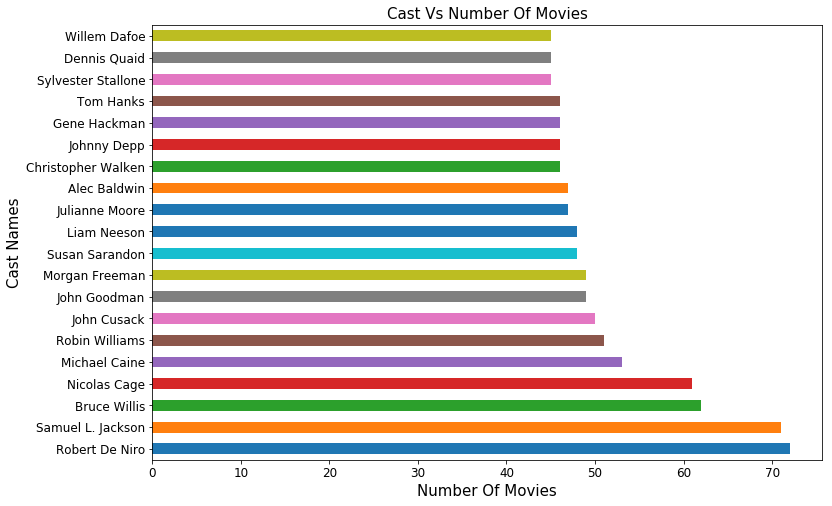

In [136]:
"""call the 'column_Count' function which created earlier for splitting and counting.
Now lets use it to count the number of movies by cast."""

count_movies_by_cast = column_Count('cast')

#plot a barh graph
count_movies_by_cast.iloc[:20].plot(kind='barh',figsize=(12,8),fontsize=12)

#setup the title and the labels 
plt.title("Cast Vs Number Of Movies",fontsize=15)
plt.xlabel("Number Of Movies",fontsize= 15)
plt.ylabel("Cast Names",fontsize= 15)
plt.show()

> From the above plot it can be shown that the most featured cast was Robert De Niro, and Samuel L. Jackson

# <a id='conclusions'></a>
## Conclusions

> <li>1- The most profitable movie is Avatar and is filmed in 2009. Star Wars: The Force Awakers is second, and Titanic is the third one.</li>
> <li>2- The least profitable movie is The Warrior’s Way and this movie also has the highest budget.</li>
> <li>3- The most popular genres was filmed Drama, Comedy, thriller and Action.</li>
> <li>4- The most filmed actor was Robert De Niro, Bruce Wills and Samual L. Jackson.</li>
> <li>5- The most filmed director was Steven Woody Allen, Clint Eastwood, and Martin Scorsese .</li>
> <li>6- The most filmed production company was Universal Pictures, Waner Bros, and Paramount Pictures.</li>
> <li>7- The most profitable month for movie release are June, ,May and December.</li>
> <li>8-According to TMDB dataset, all times most popular movies are Jurassic World and Mad Max: Fury Road</li>
> <li>10- Revenue and budget both have a positive correlation between them.</li>
> <li>11- There is a high probability that movies with higher investments result in better profit.</li>
> <li>12- There is a high probability that movies with higher popularity result in better profit.</li>
> <li>13- The year with the most number of movies release are 2014, 2013 and 2015 </li>

# Limitations

<li>These questions asked are just my own thought maybe a better questions could have been asked to increase the revenue more </li>
<li>During the data cleaning process, the budget and revenue column had almost half of the length of the whole data frame as 0, which is not helpful to my analysis.</li>
<li>I actively used Pandas.org and matplotlib plots Documentations</li>

In [131]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0